In [1]:
from __future__ import division  # so that 1/2 == 0.5, and not 0

from math import sqrt, fabs
from numpy import pi
import numpy as np
import copy

from diagonalizer_graphene import SimpleNamespace, LandauEnergyTh, FinalizedSystem_1D, diagonalize_1D, \
pSweep_1D, spectrum_plot_1D, density_plot_1D

# 1D reduction: the y-direction is infinite, $p^y$ is a good [external] quantum number)

In [2]:
SitesCount_XDefault = 511
tNNDefault = 1.0
tNNNDefault = 0.0
#The lengths are in unit of the nearest-neighbour distance of the original 2D setup
ParametersDefault = SimpleNamespace( LatticeSpacing = sqrt(3)/2, tNN = tNNDefault, tNNN = tNNNDefault, \
                                    WavefunctionComponents = 2, lBinv2 = 0., x_shift=0.0, \
                                    EigenvectorsCount = 50, EnergyPrecision = 10**(-3), 
                                    FermiEnergy = -3.*tNNNDefault, FermiVelocity = 3.*tNNDefault/2., \
                                    py = 0. )

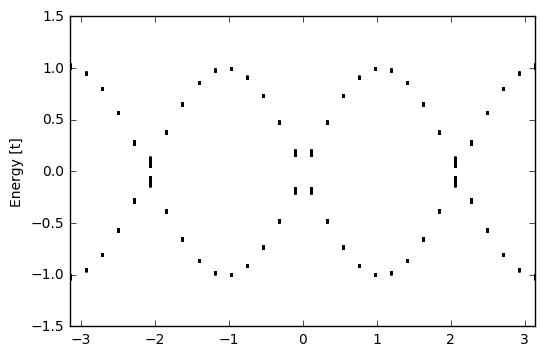

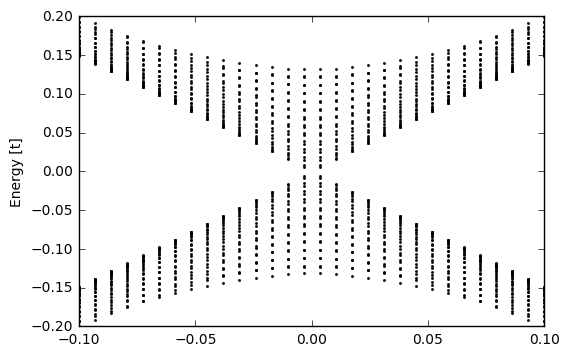

In [3]:
params = copy.copy(ParametersDefault)

sweepCount = 30

fsys1D = FinalizedSystem_1D(SitesCount_XDefault, params)

pyMin, pyMax = -pi, pi
evals, evecs = pSweep_1D(fsys1D, params, pyMin, pyMax, sweepCount)
spectrum_plot_1D( evals, pyMin, pyMax, sweepCount)
#Zoom in
#The indication of two-fold degeneracy can be resolved
#The degeneracy seems to correspond to presence of two Dirac cones (at K and at K'):
#they share the same momentum, p^y = 0
pyMin, pyMax = - 0.1, 0.1
evals, evecs = pSweep_1D(fsys1D, params, pyMin, pyMax, sweepCount)
spectrum_plot_1D( evals, pyMin, pyMax, sweepCount)


del params, fsys1D, evals, evecs, sweepCount, pyMin, pyMax

In [41]:
params = copy.copy(ParametersDefault)
pyVicinity1, pyVicinity2 = 0.01, 0.02
params.EigenvectorsCount = 10
params.EnergyPrecision = 10**(-5)

params.py = pyVicinity1
fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity1 = [energy for energy in evals if energy > params.FermiEnergy][0]

params.py = pyVicinity2
fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity2 = [energy for energy in evals if energy > params.FermiEnergy][0]

print((EnergyNodeVicinity2 - EnergyNodeVicinity1)/(pyVicinity2 - pyVicinity1), params.FermiVelocity)


params.py = pyVicinity1
fsys1D = FinalizedSystem_1D(1024, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity1 = [energy for energy in evals if energy > params.FermiEnergy][0]

params.py = pyVicinity2
fsys1D = FinalizedSystem_1D(1024, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity2 = [energy for energy in evals if energy > params.FermiEnergy][0]

print((EnergyNodeVicinity2 - EnergyNodeVicinity1)/(pyVicinity2 - pyVicinity1), params.FermiVelocity)


params.py = pyVicinity1
fsys1D = FinalizedSystem_1D(2047, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity1 = [energy for energy in evals if energy > params.FermiEnergy][0]

params.py = pyVicinity2
fsys1D = FinalizedSystem_1D(2047, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity2 = [energy for energy in evals if energy > params.FermiEnergy][0]

#The Fermi velocity is close to 3/2 (in units of t*a_NN), as expected from analytics
print((EnergyNodeVicinity2 - EnergyNodeVicinity1)/(pyVicinity2 - pyVicinity1), params.FermiVelocity)

1.47676191461 1.5
1.49337864315 1.5
1.4979309058 1.5


## In magnetic field, we have degeneracy wrt $p^y$ (in some range of $p^y$)

### And the zeroth Landau level has zero energy

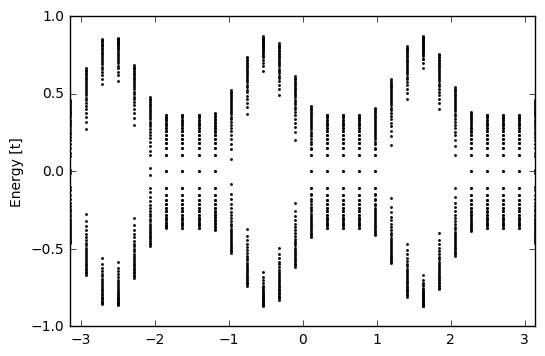

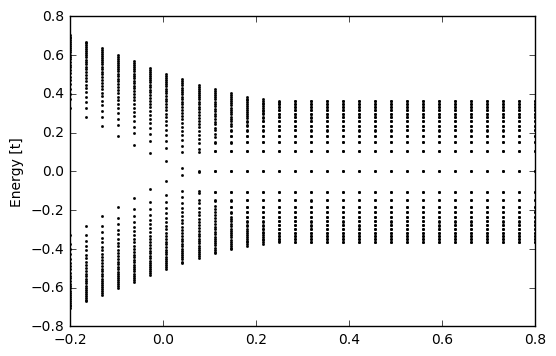

In [10]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 1. / 20.**2

fsys1D = FinalizedSystem_1D(SitesCount_XDefault, params)

evals, evecs = pSweep_1D(fsys1D, params, -pi, pi, 30)
spectrum_plot_1D( evals, -pi, pi, 30)

evals, evecs = pSweep_1D(fsys1D, params, -0.2, 0.8, 30)
spectrum_plot_1D( evals, -0.2, 0.8, 30)

del params, fsys1D, evals, evecs

## These states are localized in the bulk, and $p^y$ seems to define the average position of the state

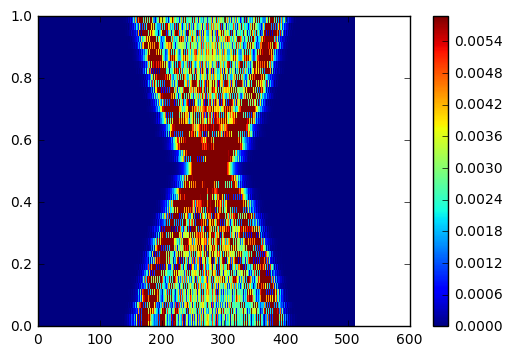

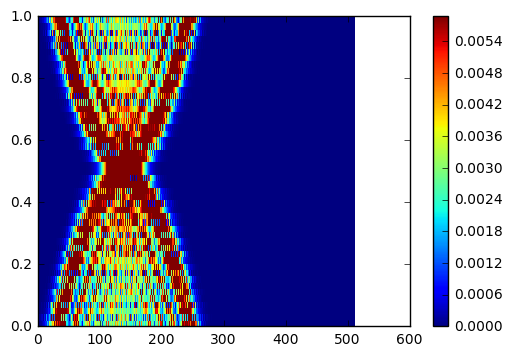

In [45]:
params = copy.copy(ParametersDefault)
params.py = 0.6
params.lBinv2 = 1. / 20.**2

fsys1D = FinalizedSystem_1D(SitesCount_XDefault, params)
evals, evecs = diagonalize_1D(fsys1D,params)
density_plot_1D(fsys1D,params,evecs)


params.py = 0.3

fsys1D = FinalizedSystem_1D(SitesCount_XDefault, params)
evals, evecs = diagonalize_1D(fsys1D,params)
density_plot_1D(fsys1D,params,evecs)



del params, fsys1D, evals, evecs

# Somehow, the "Hofstadter" physics (I mean actually the increase of the LL degeneracy from 2 to 4 or even more)

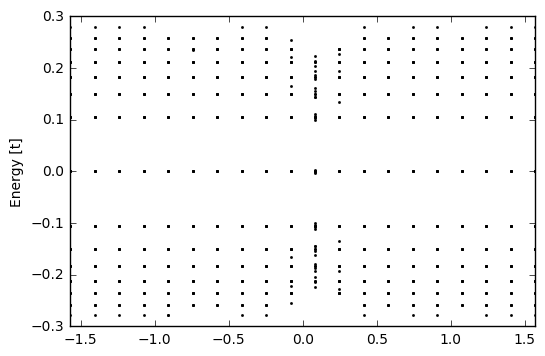

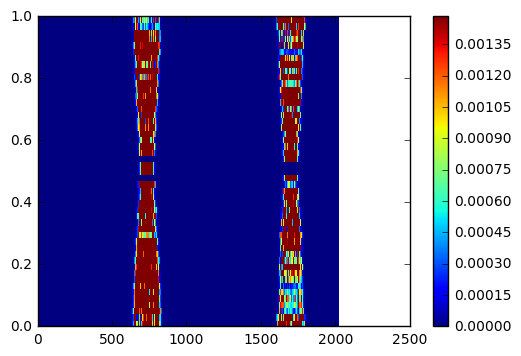

In [40]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 1. / 20.**2
params.EigenVectorsCount = 10
params.EnergyPrecision = 10**(-5)
fsys1D = FinalizedSystem_1D(2023, params)

evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)

#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.EigenVectorsCount = 10
params.py = -0.5
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)


del params, fsys1D, evals, evecs

# But once we make the number of sites twice smaller, the LL degeneracy comes back to 2

## The shift due to non-minimal coupling term $\mu^\prime$ (to the observed shift of Landau levels) seems to be too small to be resolved on top of the uncertainty of vFermi and finite-size effects!

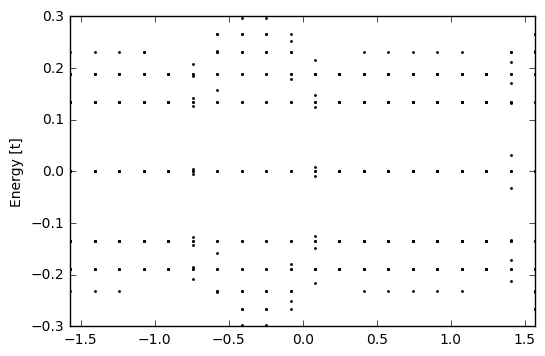

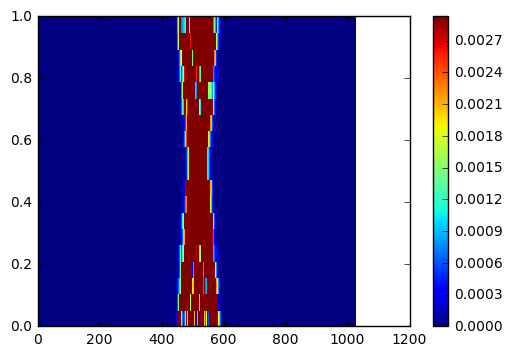

[-9.180092284351307e-17, 9.1800922843513144e-17, 0.1339622727529507, 0.13396914905528631, 0.18916118983690677, 0.18916542343009252, 0.23132827453920127, 0.23135408216931427, 0.26667554573798607, 0.26670824927729869, 0.297729228121137]
[-0.29773287760832201, -0.26676196685822123, -0.26670824927729753, -0.2313428470035867, -0.2313282745392026, -0.18916542343009118, -0.18916255938952406, -0.13396227275295125, -0.13395547148272999]
Relative splittings of energy are -5.13275062514e-05 -2.23803753825e-05
-0.00150417234678
rho2 is -0.282032315021
0.133962272753
Numerical value: -0.231328274539 Prediction with non-minimal coupling: -0.231330386572 Without non-min: -0.232379000772
Numerical value: -0.18916255939 Prediction with non-minimal coupling: -0.189165866337 Without non-min: -0.18973665961
Numerical value: -0.133955471483 Prediction with non-minimal coupling: -0.133962272753 Without non-min: -0.13416407865
Numerical value: -9.18009228435e-17 Prediction with non-minimal coupling: 0.0 With

In [7]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 0.004
params.EigenvectorsCount = 20
params.EnergyPrecision = 10**(-6)

fsys1D = FinalizedSystem_1D(1024, params)
evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)
#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.py = -0.3
fsys1D = FinalizedSystem_1D(1024, params)
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)


AboveNodeEnergies = [energy for energy in evals if energy > params.FermiEnergy - 0.01]
print(AboveNodeEnergies)
AboveNodeEnergiesCut = [AboveNodeEnergies[0], AboveNodeEnergies[2], AboveNodeEnergies[4], AboveNodeEnergies[6]]

BelowNodeEnergies = [energy for energy in evals if energy <= params.FermiEnergy - 0.01]
print(BelowNodeEnergies)
BelowNodeEnergiesCut = [BelowNodeEnergies[len(BelowNodeEnergies)-1], BelowNodeEnergies[len(BelowNodeEnergies)-3], \
                    BelowNodeEnergies[len(BelowNodeEnergies)-5]]

print('Relative splittings of energy are', AboveNodeEnergies[2]/AboveNodeEnergies[3]-1., \
      AboveNodeEnergies[4]/AboveNodeEnergies[5]-1.)

print(AboveNodeEnergiesCut[1] / LandauEnergyTh(1, params) - 1)

rho2_extr = AboveNodeEnergiesCut[1] / (params.lBinv2)**(3/2) / (2.*sqrt(2.)) - params.FermiVelocity / params.lBinv2 / 2. #(AboveNodeEnergiesCut[1] / LandauEnergyTh(1, params) - 1) / params.lBinv2 / 2.
print('rho2 is', rho2_extr)
print(LandauEnergyTh(1, params, rho2 = rho2_extr))

for i in reversed(range(len(BelowNodeEnergiesCut))):
    print('Numerical value:',BelowNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(-i-1, params, rho2 = rho2_extr), \
          'Without non-min:', \
          LandauEnergyTh(-i-1, params))
for i in range(len(AboveNodeEnergiesCut)):
    print('Numerical value:', AboveNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(i, params, rho2 = rho2_extr), 'Without non-min:', \
         LandauEnergyTh(i, params))


del params, fsys1D, evals, evecs, AboveNodeEnergies, AboveNodeEnergiesCut, BelowNodeEnergies, BelowNodeEnergiesCut

## Now, the magnetic field is smaller, while the non-minimal coupling is used the same as in the fitting above: the numerical points are described well

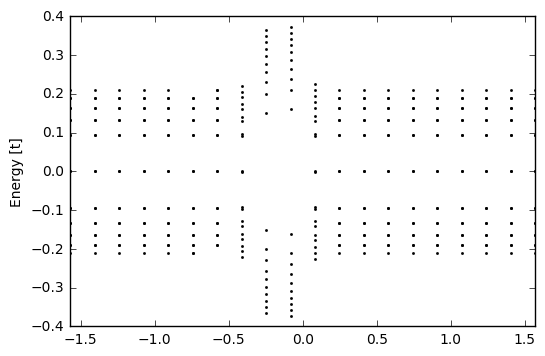

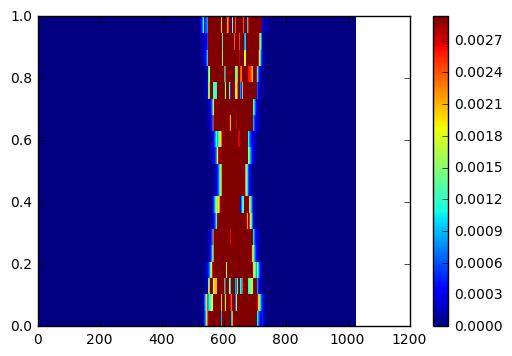

[-5.7021528923426826e-17, 5.7021528923426727e-17, 0.09479290034050189, 0.094797080167211042, 0.13396247737893879, 0.13396314000279003, 0.16394617697969299, 0.16394881433564737, 0.18915422564145526, 0.18916571771346571, 0.21132608145173812, 0.21133356508449147]
[-0.18918102424034447, -0.18916571771346744, -0.16394617697969383, -0.16393869333848757, -0.1339717933063943, -0.13396247737893974, -0.094807161361725664, -0.094797080167211736]
Numerical value: -0.163938693338 Prediction with non-minimal coupling: -0.163946026145
Numerical value: -0.133962477379 Prediction with non-minimal coupling: -0.133962272753
Numerical value: -0.0947970801672 Prediction with non-minimal coupling: -0.0947969806459
Numerical value: -5.70215289234e-17 Prediction with non-minimal coupling: 0.0
Numerical value: 0.0947929003405 Prediction with non-minimal coupling: 0.0947969806459
Numerical value: 0.133962477379 Prediction with non-minimal coupling: 0.133962272753
Numerical value: 0.16394617698 Prediction with n

In [8]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 0.002
params.EigenvectorsCount = 20
params.EnergyPrecision = 10**(-6)

fsys1D = FinalizedSystem_1D(1024, params)
evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)
#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.py = -1.0
fsys1D = FinalizedSystem_1D(1024, params)
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)


AboveNodeEnergies = [energy for energy in evals if energy > params.FermiEnergy - 0.01]
print(AboveNodeEnergies)
AboveNodeEnergiesCut = [AboveNodeEnergies[0], AboveNodeEnergies[2], AboveNodeEnergies[4], AboveNodeEnergies[6]]

BelowNodeEnergies = [energy for energy in evals if energy <= params.FermiEnergy - 0.01]
print(BelowNodeEnergies)
BelowNodeEnergiesCut = [BelowNodeEnergies[len(BelowNodeEnergies)-1], BelowNodeEnergies[len(BelowNodeEnergies)-3], \
                    BelowNodeEnergies[len(BelowNodeEnergies)-5]]

for i in reversed(range(len(BelowNodeEnergiesCut))):
    print('Numerical value:',BelowNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(-i-1, params, rho2 = rho2_extr))
for i in range(len(AboveNodeEnergiesCut)):
    print('Numerical value:', AboveNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(i, params, rho2 = rho2_extr))


del params, fsys1D, evals, evecs, AboveNodeEnergies, AboveNodeEnergiesCut, BelowNodeEnergies, BelowNodeEnergiesCut